In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
"""
Input file - please change for each case study

Valinomycin = valinomycin_MSMS_from_mestrenova_processed.csv
Surfactin B = surfactinB_MSMS_from_mestrenova_processed.csv
Neomycin B = neomycinB_MSMS_from_mestrenova_processed.csv
"""

input_file = "surfactinB_MSMS_from_mestrenova_processed.csv"

df = pd.read_csv(input_file)

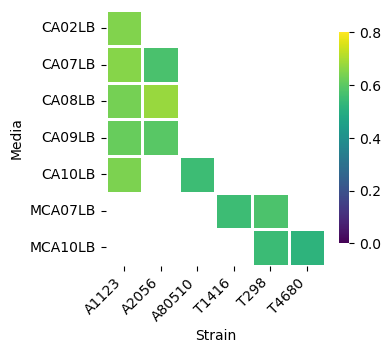

In [7]:
# 1. Resolve overlapping entries by taking the higher combined_score for each (strain, media) combination
df_agg = df.groupby(['parent', 'media'])['WISE Score'].max().reset_index()

# 2. Pivot the dataframe to create a matrix where strain is the index (y-axis), media is the columns (x-axis)
df_pivot = df_agg.pivot(index='media', columns='parent', values='WISE Score')

# 3. Create the heatmap using the 'viridis' colormap with a smaller color bar
plt.figure(figsize=(4, 4))  # Adjust figure size to ensure square-shaped cells (8,8 for val and neoB, 4,4 for surfB)
sns.heatmap(df_pivot, annot=False, cmap='viridis', cbar=True, square=True, linewidths=1, vmin=0, vmax=0.8,
            cbar_kws={'shrink': 0.7})  # Shrink the color bar by 0.7 for surfB, 0.3 for val & neoB

# Set plot labels
#plt.title('Combined Score Heatmap')
plt.xlabel('Strain')
plt.ylabel('Media')

# Rotate x-axis (media) labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate media labels for better readability

# Save the heatmap as a PNG file
plt.tight_layout()  # Adjusts the plot to fit in the figure area nicely
plt.savefig(f'{input_file[:-4]}_heatmap.png', dpi=300)  # Save as PNG file with high resolution (300 DPI)

# Show plot
plt.show()